<a href="https://colab.research.google.com/github/Pepe9793/ML_Experiments/blob/Experiments/Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


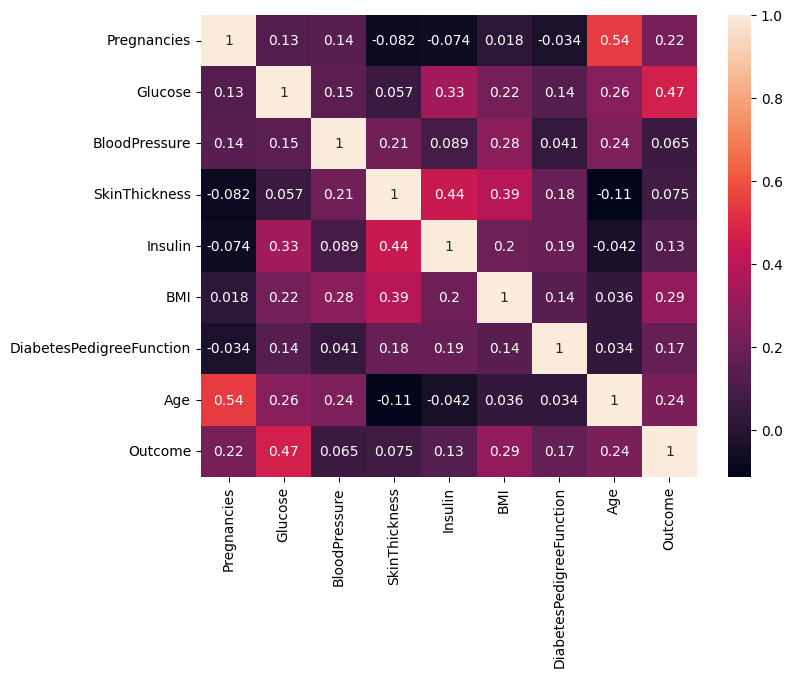

In [148]:
df.isnull().sum()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [149]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
dt = DecisionTreeClassifier(
    criterion="gini",     # default
    max_depth=None,       # full tree
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [150]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7467532467532467


In [151]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



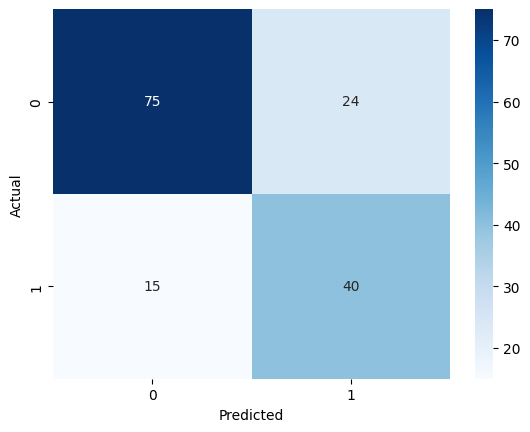

In [152]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


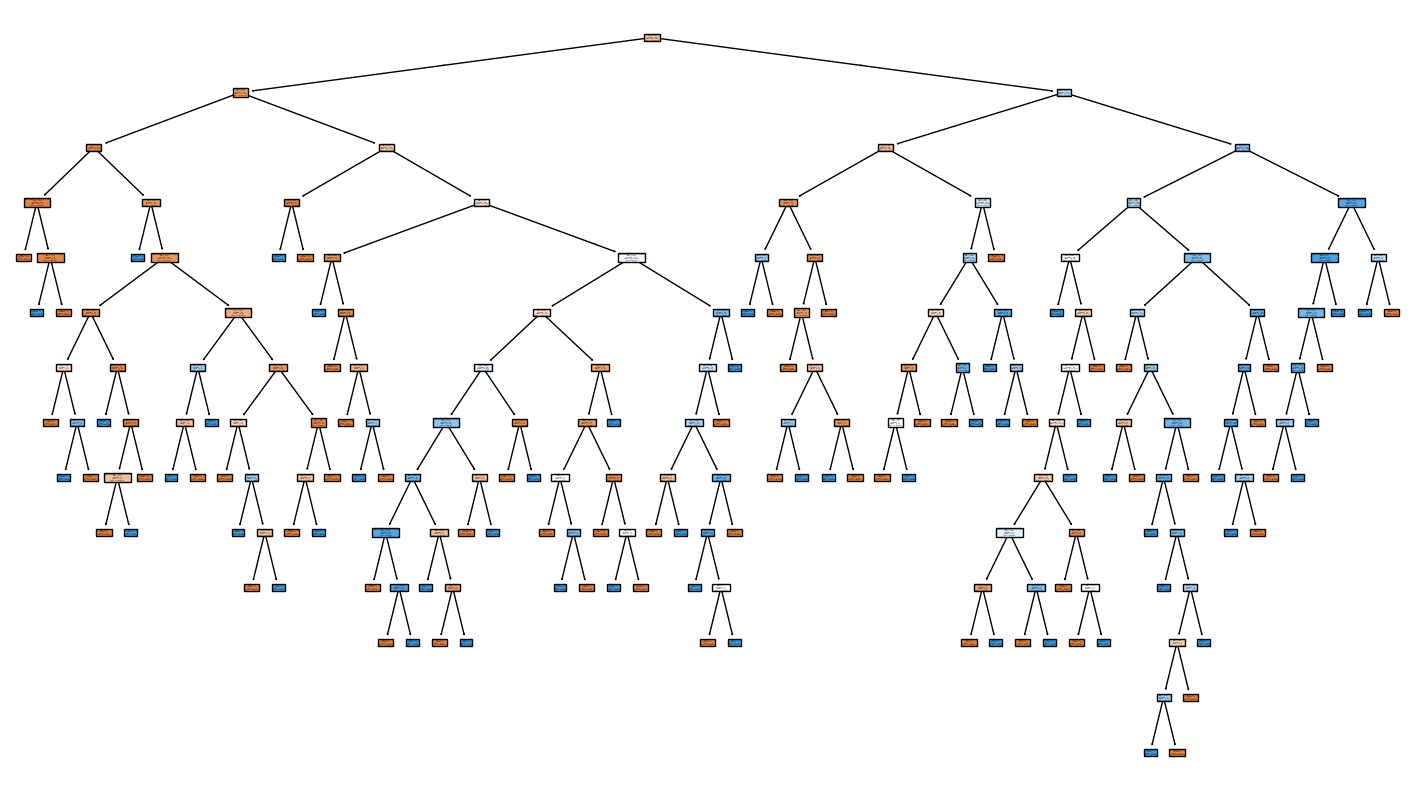

In [153]:
plt.figure(figsize=(18,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Diabetes","Diabetes"])
plt.show()


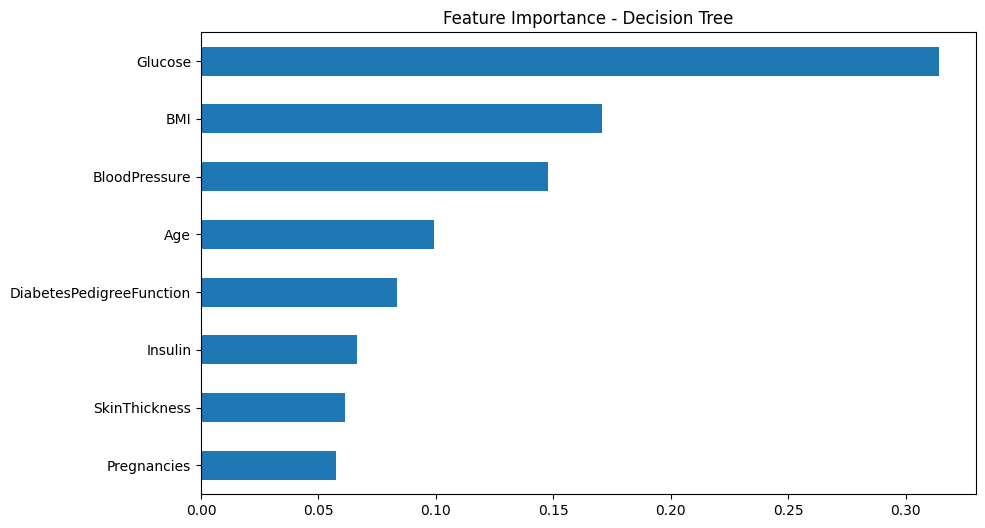

In [154]:
plt.figure(figsize=(10,6))
feat = pd.Series(dt.feature_importances_, index=X.columns)
feat.sort_values().plot(kind='barh')
plt.title("Feature Importance - Decision Tree")
plt.show()


## Experiment Results Report

### Model Training and Evaluation
The Decision Tree Classifier was trained on the diabetes dataset, and its performance was evaluated using accuracy, a classification report, and a confusion matrix.

### Overall Accuracy
The model achieved an overall accuracy of **0.7467 (74.67%)** on the test set.

### Classification Report
Here's a breakdown of the model's performance for each class (0: No Diabetes, 1: Diabetes):

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.83      | 0.76   | 0.79     | 99      |
| 1     | 0.62      | 0.73   | 0.67     | 55      |

*   **Precision (Class 0)**: Out of all instances predicted as 'No Diabetes', 83% were actually 'No Diabetes'.
*   **Recall (Class 0)**: Out of all actual 'No Diabetes' instances, 76% were correctly identified.
*   **Precision (Class 1)**: Out of all instances predicted as 'Diabetes', 62% were actually 'Diabetes'.
*   **Recall (Class 1)**: Out of all actual 'Diabetes' instances, 73% were correctly identified.

The model shows better precision for predicting 'No Diabetes' (Class 0) but similar recall for both classes.

### Confusion Matrix
The confusion matrix provides a detailed view of correct and incorrect classifications:

|            | Predicted No Diabetes | Predicted Diabetes |
|------------|-----------------------|--------------------|
| **Actual No Diabetes** | 75                    | 24                 |
| **Actual Diabetes**    | 15                    | 40                 |

*   **True Positives (Actual 1, Predicted 1)**: 40
*   **True Negatives (Actual 0, Predicted 0)**: 75
*   **False Positives (Actual 0, Predicted 1)**: 24 (Type I Error)
*   **False Negatives (Actual 1, Predicted 0)**: 15 (Type II Error)

The model correctly identified 75 non-diabetic and 40 diabetic cases, but misclassified 24 non-diabetic as diabetic and 15 diabetic as non-diabetic.

### Feature Importance
The following features were identified as most important by the Decision Tree model:

| Feature                  | Importance Score |
|--------------------------|------------------|
| Glucose                  | 0.3142           |
| BMI                      | 0.1707           |
| BloodPressure            | 0.1477           |
| Age                      | 0.0992           |
| DiabetesPedigreeFunction | 0.0833           |
| Insulin                  | 0.0663           |
| SkinThickness            | 0.0612           |
| Pregnancies              | 0.0575           |

**Glucose** is the most influential feature in the decision-making process of this model, followed by **BMI** and **BloodPressure**.